$\newcommand{\ket}[1]{\left|#1\right>}$

$\newcommand{\bra}[1]{\left<#1\right|}$

$\newcommand{\braket}[2]{\left<#1 | #2\right>}$

# General representation of a qbit state

Everything here is taken from the IBM quantum computing User Guide and introduction to quantum computing:
https://quantum-computing.ibm.com/docs/guide/

We already saw that the state of a qubit can be represented as:

$\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$

where $\alpha$ and $\beta$ are complex coefficients that satisfy the relation:

$ |\alpha|^2 + |\beta|^2 = 1 $

We also noticed that, given the fact that $\alpha$ and $\beta$ are complex numbers that have to satisfy the above relation, we can rewrite the state $\ket{\psi}$ of a qubit as:

$\ket{\psi} = \sqrt{p} \ket{0} + e^{i\phi} \sqrt{1 - p} \ket{1} $

Where $p$ is the probability to observe the qbit in the $\ket{0}$ state and $\phi$ is the qubit phase.

Being a probability, $0 \leq p \leq 1$, so that we can use another notation to express the qubit state:

$\ket{\psi} = \cos(\theta/2)\ket{0} + \sin(\theta/2) e^{i\phi} \ket{1} $

where now:
- $0 \leq \theta \leq \pi$
- $0 \leq \phi \leq 2 \pi$

With this new representation, the state of a qbit can be thouoght as a point on a sphere in $\mathbb{R}^3$, known as the Bloch sphere.

Additionally, it is possible to define a general operator $U$, able to change the qbit state from any state $\ket{\psi}$ to another state $\ket{\psi '}$:

$\ket{\psi '} = U \ket{\psi}$  

U has to be unitary:

$U U^{\dagger} = I$

And it assumes the form:

$ U(\theta, \phi, \lambda) = 
\begin{bmatrix}
    \cos(\theta/2) & -e^{i \lambda} \sin(\theta/2) \\
    e^{i \phi} \sin(\theta/2) & e^{i(\lambda + \phi)} \cos(\theta/2) 
\end{bmatrix}
$

### The phase gate u1

From $U$, it is possible to create any gate to change the state of the qbit. For example, we can choose to modify just the phase of our qbit state, introducing the phase gate:

$ u1(\lambda) = U(0, 0, \lambda) = 
\begin{bmatrix}
    1 & 0 \\
    0 & e^{i\lambda} 
\end{bmatrix}
$

The gates $T$, $T^{\dagger}$, $S$, $S^{\dagger}$, and $Z$ are specific cases of the u1 gate. 

### The gate u2

If we now decide to change not just the phase, but also the $\phi$ parameter, we get the u2 gate:

$ u2(\phi, \lambda) = U(\frac{\pi}{2}, \phi, \lambda) = \dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1         & -e^{i\lambda} \\
    e^{i\phi} & e^{i (\lambda + \phi)} 
\end{bmatrix}
$


The superposition gate H corresponds to:

$H = u2(0, \pi)$ 

### The gate u3

Following this approach, the $U$ operator is also called u3 gate:

$u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda)$

In the following example, we are going to see the projection of a qbit state on the fundamental state $\ket{0}$, when changing the value of $\theta$ from 0 to $2 \pi$, in 50 steps. 

In [1]:
# example_u3.py
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, execute, Aer

# Build the circuits
circuits = []
middle = QuantumCircuit(1, 1)
meas = QuantumCircuit(1, 1)
meas.barrier()
meas.measure(0, 0)

# I use 50 values of theta
exp_vector = range(0,50)
exp_theta = []
theta = 0.0
for exp_index in exp_vector:
    delta_theta = 2*np.pi/len(exp_vector)
    theta = theta + delta_theta
    exp_theta.append(theta)
    middle.u3(delta_theta,0,0,0)
    circuits.append(middle + meas)

In [2]:
# Execute the circuits
shots = 1024
job = execute(circuits, backend = Aer.get_backend('qasm_simulator'),
              shots=shots, seed_simulator=8)
result = job.result()

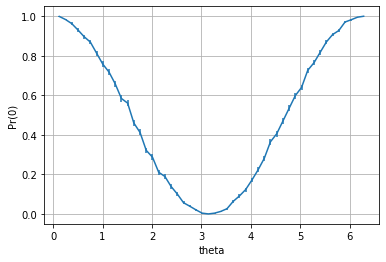

In [3]:
# Plot the result
exp_data = []
exp_error = []
for exp_index in exp_vector:
    data = result.get_counts(circuits[exp_index])
    try:
        p0 = data['0']/shots
    except KeyError:
        p0 = 0
    exp_data.append(p0)
    exp_error.append(np.sqrt(p0*(1-p0)/shots))

plt.errorbar(exp_theta, exp_data, exp_error)
plt.xlabel('theta')
plt.ylabel('Pr(0)')
plt.grid(True)
plt.show()

## The Bloch Sphere

In other words, we can visualize the state of a qbit as one point of a surface of a sphere of radius 1, known as Bloch sphere:

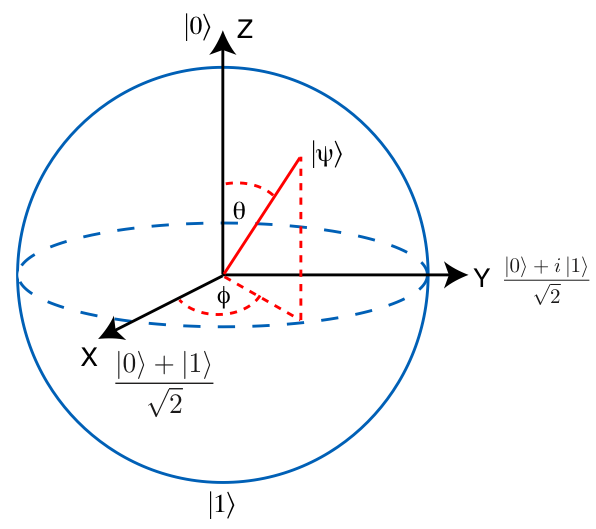

In [4]:
from IPython.display import Image
Image("Bloch.png")

## Understand the parameters

Let's try and understand the effect of the three parameter on the qbit state, using the Bloch sphere to  make the results easier to interpret.

### 1. The $\lambda$ parameter 

To see the effect of changing the $\lambda$ parameter, we are going to apply several times the u1 gate to a qbit state.

Since it is equivalent, we are going to use the operator u3($\theta$, $\phi$, $\lambda$), changing only the $\lambda$ parameter.

In [70]:
# quantum_phase_bloch.py
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.tools.visualization import plot_bloch_vector

# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuits
pre = QuantumCircuit(q, c)
pre.h(q)
pre.barrier()

meas_x = QuantumCircuit(q, c)
meas_x.barrier()
meas_x.h(q)
meas_x.measure(q, c)

meas_y = QuantumCircuit(q, c)
meas_y.barrier()
meas_y.s(q).inverse()
meas_y.h(q)
meas_y.measure(q, c)

meas_z = QuantumCircuit(q, c)
meas_z.barrier()
meas_z.measure(q, c)

bloch_vector = ['x', 'y', 'z']
exp_vector = range(0, 21)
circuits = []
for exp_index in exp_vector:
    middle = QuantumCircuit(q, c)
    lambda_phase = 2*np.pi*exp_index/(len(exp_vector)-1)
    middle.u3(0, 0, lambda_phase, q)
    circuits.append(pre + middle + meas_x)
    circuits.append(pre + middle + meas_y)
    circuits.append(pre + middle + meas_z)
    

In [71]:
# Execute the circuit
job = execute(circuits, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()

In [72]:
# Plot the result
all_blochs = []
for exp_index in exp_vector:
    bloch = [0, 0, 0]
    for bloch_index in range(len(bloch_vector)):
        data = result.get_counts(circuits[3*exp_index+bloch_index])
        try:
            p0 = data['0']/1024.0
        except KeyError:
            p0 = 0
        try:
            p1 = data['1']/1024.0
        except KeyError:
            p1 = 0
        bloch[bloch_index] = p0-p1
    all_blochs.append(bloch) 
    plot_bloch_vector(bloch)

In [73]:
def show_figure(fig):
    new_fig = plt.figure()
    new_mngr = new_fig.canvas.manager
    new_mngr.canvas.figure = fig
    fig.set_canvas(new_mngr.canvas)
    plt.show(fig)

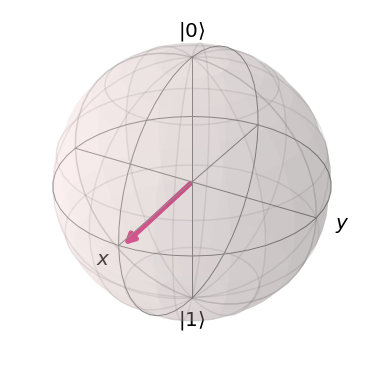

In [74]:
from IPython.display import clear_output
import time

for i in range(len(all_blochs)):
    show_figure(plot_bloch_vector(all_blochs[i]))
    clear_output(wait=True)
    time.sleep(1)

### 2. The $\phi$ parameter 

To see the effect of changing the $\phi$ parameter, we are going to apply several times the u2 gate to a qbit state.

Since it is equivalent, we are going to use the operator u3($\theta$, $\phi$, $\lambda$), changing only the $\phi$ parameter.

In [57]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.tools.visualization import plot_bloch_vector

# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuits
pre = QuantumCircuit(q, c)
pre.h(q)
pre.barrier()

meas_x = QuantumCircuit(q, c)
meas_x.barrier()
meas_x.h(q)
meas_x.measure(q, c)

meas_y = QuantumCircuit(q, c)
meas_y.barrier()
meas_y.s(q).inverse()
meas_y.h(q)
meas_y.measure(q, c)

meas_z = QuantumCircuit(q, c)
meas_z.barrier()
meas_z.measure(q, c)

bloch_vector = ['x', 'y', 'z']
exp_vector = range(0, 21)
circuits = []
for exp_index in exp_vector:
    middle = QuantumCircuit(q, c)
    phi_phase = 2*np.pi*exp_index/(len(exp_vector)-1)
    middle.u3(0, phi_phase, 0, q)
    circuits.append(pre + middle + meas_x)
    circuits.append(pre + middle + meas_y)
    circuits.append(pre + middle + meas_z)

In [58]:
# Execute the circuit
job = execute(circuits, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()

In [59]:
# Plot the result
all_blochs = []
for exp_index in exp_vector:
    bloch = [0, 0, 0]
    for bloch_index in range(len(bloch_vector)):
        data = result.get_counts(circuits[3*exp_index+bloch_index])
        try:
            p0 = data['0']/1024.0
        except KeyError:
            p0 = 0
        try:
            p1 = data['1']/1024.0
        except KeyError:
            p1 = 0
        bloch[bloch_index] = p0-p1
    all_blochs.append(bloch) 
    plot_bloch_vector(bloch)

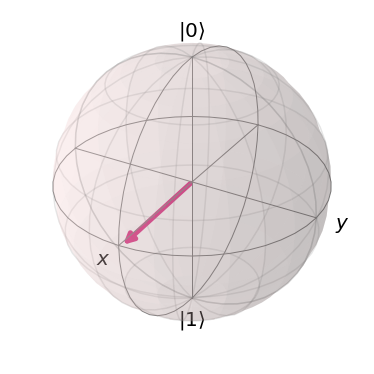

In [60]:
from IPython.display import clear_output
import time

for i in range(len(all_blochs)):
    show_figure(plot_bloch_vector(all_blochs[i]))
    clear_output(wait=True)
    time.sleep(1)

### 3. The $\theta$ parameter 

To see the effect of changing the $\theta$ parameter, we are going to apply several times the u3($\theta$, $\phi$, $\lambda$) gate to a qbit state, touching only the $\theta$ parameter.

In [61]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.tools.visualization import plot_bloch_vector

# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuits
pre = QuantumCircuit(q, c)
pre.h(q)
pre.barrier()

meas_x = QuantumCircuit(q, c)
meas_x.barrier()
meas_x.h(q)
meas_x.measure(q, c)

meas_y = QuantumCircuit(q, c)
meas_y.barrier()
meas_y.s(q).inverse()
meas_y.h(q)
meas_y.measure(q, c)

meas_z = QuantumCircuit(q, c)
meas_z.barrier()
meas_z.measure(q, c)

bloch_vector = ['x', 'y', 'z']
exp_vector = range(0, 21)
circuits = []
for exp_index in exp_vector:
    middle = QuantumCircuit(q, c)
    theta_phase = 2*np.pi*exp_index/(len(exp_vector)-1)
    middle.u3(theta_phase, 0, 0, q)
    circuits.append(pre + middle + meas_x)
    circuits.append(pre + middle + meas_y)
    circuits.append(pre + middle + meas_z)
    

In [62]:
# Execute the circuit
job = execute(circuits, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()

In [63]:
# Plot the result
all_blochs = []
for exp_index in exp_vector:
    bloch = [0, 0, 0]
    for bloch_index in range(len(bloch_vector)):
        data = result.get_counts(circuits[3*exp_index+bloch_index])
        try:
            p0 = data['0']/1024.0
        except KeyError:
            p0 = 0
        try:
            p1 = data['1']/1024.0
        except KeyError:
            p1 = 0
        bloch[bloch_index] = p0-p1
    all_blochs.append(bloch) 
    plot_bloch_vector(bloch)

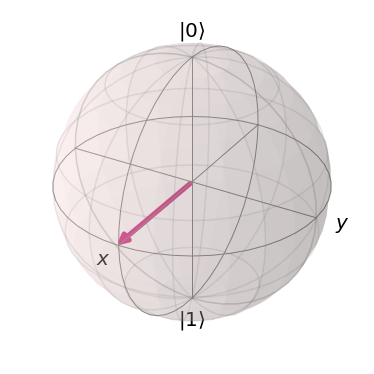

In [64]:
from IPython.display import clear_output
import time

for i in range(len(all_blochs)):
    show_figure(plot_bloch_vector(all_blochs[i]))
    clear_output(wait=True)
    time.sleep(1)